### Heart Attack Data Set Analysis & Prediction

This data set is about 14 features about 303 people. The last feature indicates if the person had a heart attack. By using this data, I will use SCIKITLearn and XGBoost in order to understand the importances of these features in terms of a probable heart attach, and also build a machine learning algorithm which will predict the probability of one's having a heart attack. 

The data is retreived from Kaggle. More info about the features can be accesed from the source.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.size

4242

In [6]:
df.shape

(303, 14)

In [7]:
?df

Type:        DataFrame
String form:
age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
           0     63    1   3  <...>   2      3       0
           301    1      3       0
           302    1      2       0
           
           [303 rows x 14 columns]
Length:      303
File:        c:\users\yakup\anaconda3\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order fol

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
y = df["output"]
X = df.drop(["output"], axis=1)

In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [6]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Statsmodels

In [16]:
import statsmodels.api as sm

In [17]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.351932
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  303
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                           12
Date:                Fri, 06 May 2022   Pseudo R-squ.:                  0.4893
Time:                        14:53:21   Log-Likelihood:                -106.64
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 4.088e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0128      0.019      0.670      0.503      -0.025       0.050
sex           -1.6381      0.452     -3.625      0.000      -2.524      -0.752
cp             0.8490      0.184      4.613      0.000       0.488       1.210
trtbps        -0.0153      0.010     -1.562      0.118      -0.035       0.004
chol          -0.0036      0.004     -0.960      0.337      -0.011       0.004
fbs           -0.0115      0.526     -0.022      0.983      -1.042       1.019
restecg        0.5432      0.342      1.589      0.112      -0.127       1.213
thalachh       0.0319      0.008      3.779      0.000       0.015       0.048
exng          -0.8920      0.403     -2.215      0.027      -1.681      -0.103
oldpeak       -0.4988      0.209     -2.381      0.017      -0.909      -0.088
slp            0.6092      0.346      1.761      0.078      -0.069       1.287
caa           -0.7725      0.189     -4.080      0.000      -1.144      -0.401
thall         -0.8438      0.287     -2.937      0.003      -1.407      -0.281
==============================================================================
"""

### SCKITLearn

In [7]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [8]:
loj_model.intercept_

array([0.40801487])

In [9]:
loj_model.coef_

array([[ 0.00904325, -1.37761438,  0.80244742, -0.01546108, -0.00329025,
        -0.01009783,  0.45979934,  0.02940349, -0.78418759, -0.50843867,
         0.51947271, -0.72961236, -0.80239277]])

### Prediction

In [10]:
y_pred = loj_model.predict(X)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [12]:
confusion_matrix(y, y_pred)

array([[105,  33],
       [ 12, 153]], dtype=int64)

In [13]:
accuracy_score(y, y_pred)

0.8514851485148515

In [14]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82       138
           1       0.82      0.93      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.84      0.85       303
weighted avg       0.86      0.85      0.85       303



In [15]:
loj_model.predict(X)[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

bak 1 ve sifir degeri veriyor, yaptigi bu modelin

Peki 1 ve sifir verme, 1 ve 0 in gerceklesme ihtimalini versin istersek?

Asagidaki fonksiyon bunu yapicak

In [16]:
loj_model.predict_proba(X)[0:10]

array([[0.19347174, 0.80652826],
       [0.32930619, 0.67069381],
       [0.06417403, 0.93582597],
       [0.08102719, 0.91897281],
       [0.18229419, 0.81770581],
       [0.2544899 , 0.7455101 ],
       [0.20792945, 0.79207055],
       [0.15597889, 0.84402111],
       [0.20067288, 0.79932712],
       [0.07759354, 0.92240646]])

tablonun sol satiri, 0 in gerceklesme olasiligi, sag satiri 1 in gerceklesme olasiligi, tutarli gorunuyor predict ile karsilastirmali kontrol ettigimizde:

In [17]:
y[0:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: output, dtype: int64

# XGBoost

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [20]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2


In [21]:
y_train.head()

124    1
72     1
15     1
10     1
163    1
Name: output, dtype: int64

In [35]:
#!pip install xgboost

In [22]:
from xgboost import XGBClassifier

In [23]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [42]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [24]:
y_pred = xgb_model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.8021978021978022

## Model Tuning

In [46]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [47]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [48]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[15:53:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [49]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [26]:
xgb = XGBClassifier(learning_rate = 0.01, 
 max_depth = 3,
 min_samples_split= 2,
 n_estimators = 500,
 subsample = 0.6)

In [27]:
xgb_tuned =  xgb.fit(X_train,y_train)

[18:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [28]:
y_pred = xgb_tuned.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.8241758241758241

an example case

In [63]:
m = np.array([[  34,  1,  0,  110, 180,  0,  0,  185, 0, 1.4, 1, 2, 2]])

In [64]:
xgb_tuned.predict(m)

array([0])

### Feature Importances for Heart Attack

In [30]:
xgb_tuned.feature_importances_

array([0.04595916, 0.05487029, 0.12713787, 0.04067828, 0.03705909,
       0.04141707, 0.04406951, 0.05045693, 0.1243525 , 0.07481208,
       0.07742859, 0.13613346, 0.14562511], dtype=float32)

In [31]:
Importance = pd.DataFrame({"Importance": xgb_tuned.feature_importances_*100},
                         index = X_train.columns)

In [32]:
Importance

,Importance
age,4.595916
sex,5.487029
cp,12.713787
trtbps,4.067828
chol,3.705909
fbs,4.141706
restecg,4.406950
thalachh,5.045693
exng,12.435250
oldpeak,7.481208


In [35]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True, inplace = True)

In [36]:
Importance

,Importance
chol,3.705909
trtbps,4.067828
fbs,4.141706
restecg,4.406950
age,4.595916
thalachh,5.045693
sex,5.487029
oldpeak,7.481208
slp,7.742859
exng,12.435250


In [37]:
import seaborn as sns

[Text(0.5, 1.0, 'Importances of Features'), Text(0, 0.5, 'Feature')]

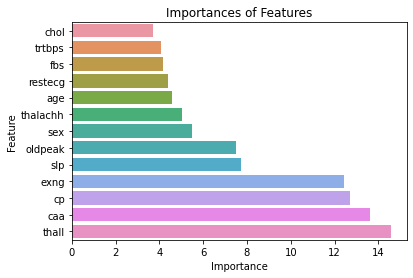

In [44]:
sns.barplot(data = Importance, x = Importance['Importance'], y = Importance.index).set(title = 'Importances of Features', ylabel = 'Feature')

Data Source: Kaggle. Heart Attack Analysis & Prediction Dataset. Retrieved from: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset. Access date: 06.05.2022